In [19]:
# importer des informations
import pandas as pd
import os
ppi = pd.read_csv('Decagon/data/ppi/bio-decagon-ppi.csv') # lien entre protéines
pmi = pd.read_csv('Decagon/data/cible/bio-decagon-targets.csv') # cible des médicaments
combo = pd.read_csv('Decagon/data/combo/bio-decagon-combo.csv') # effet de deux médicaments
typ = pd.read_csv('Decagon/data/type/bio-decagon-effectcategories.csv') # type effet secondaire
mono = pd.read_csv('Decagon/data/mono/bio-decagon-mono.csv') # effet secondaire d'un médicament

In [20]:
# on choisi les effet secondaire en lien avec le cancer
Cancer=typ.loc[typ.iloc[:, 2] == "cancer",:]
Cancer=Cancer.iloc[:, 0].tolist()

In [22]:
#Selection des couples de drogues avec pour effet combiné le side effect choisi
CD = []

for i in range(len(combo)):
    if combo.iloc[i, 2] in Cancer: 
        gene1 = combo.iloc[i, 1]
        gene2 = combo.iloc[i, 0]
        
        if gene1 not in CD:
            CD.append(gene1)
        if gene2 not in CD:
            CD.append(gene2)



579

In [47]:
CD=CD[:10]
CD

['CID000150610',
 'CID000003929',
 'CID000005064',
 'CID000001302',
 'CID000010631',
 'CID000005267',
 'CID000005376',
 'CID000004601',
 'CID000005556',
 'CID000005090']

In [2]:
Drugs = []
for drug in combo.iloc[:, 0].tolist()+combo.iloc[:, 1].tolist():
    if drug not in Drugs:
        Drugs.append(drug)
len(Drugs)

645

In [48]:
import random
# récupère les protéines liées à ces 60 drogues
mask = [D in CD for D in pmi.iloc[:, 0]]
P60 = pmi[mask] 

In [49]:
# récupère les liens entre les protéines liées à ces 60 drogues
Prot = []
for prot in P60.iloc[:, 1]:
    if prot not in Prot:
        Prot.append(prot)
# Prot avec toutes les protéines connectées aux 60 drogues

In [27]:
# liste de couple de toutes les protéines
couple=[]
for i in range(len(ppi)):
    gene1=int(ppi.iloc[i, 0])
    gene2=int(ppi.iloc[i, 1])
    couple.append((gene1,gene2))
# on a 715612 lien entre protéines

In [50]:
# graphe avec les protéines des 60 drogues
PPI60=[]
for ppi1 in couple:
    if ppi1[0] in Prot and ppi1[1] in Prot:
        PPI60.append((ppi1[0],ppi1[1]))
# on prélève le nombre de protéines selon les drogues choisies

In [29]:
# affiche les propriétés du graphique de protéine prélevé
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
# on defini un graph
PPI = nx.Graph()
PPI.add_edges_from(PPI60)
PPI.add_nodes_from(Prot)

In [52]:
# prop du graphe 
n_nodes = PPI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = PPI.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(PPI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in PPI.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")

Nombre de noeuds : 188
Nombre d'arêtes : 3370
Densité : 0.191717
Degré moyen : 35.85
Degré min : 0
Degré max : 101


In [53]:
# trouve les noeuds isolés
isolés = [i for i in PPI.nodes() if PPI.degree(i) == 0]
connectés = [i for i in PPI.nodes() if PPI.degree(i) != 0]

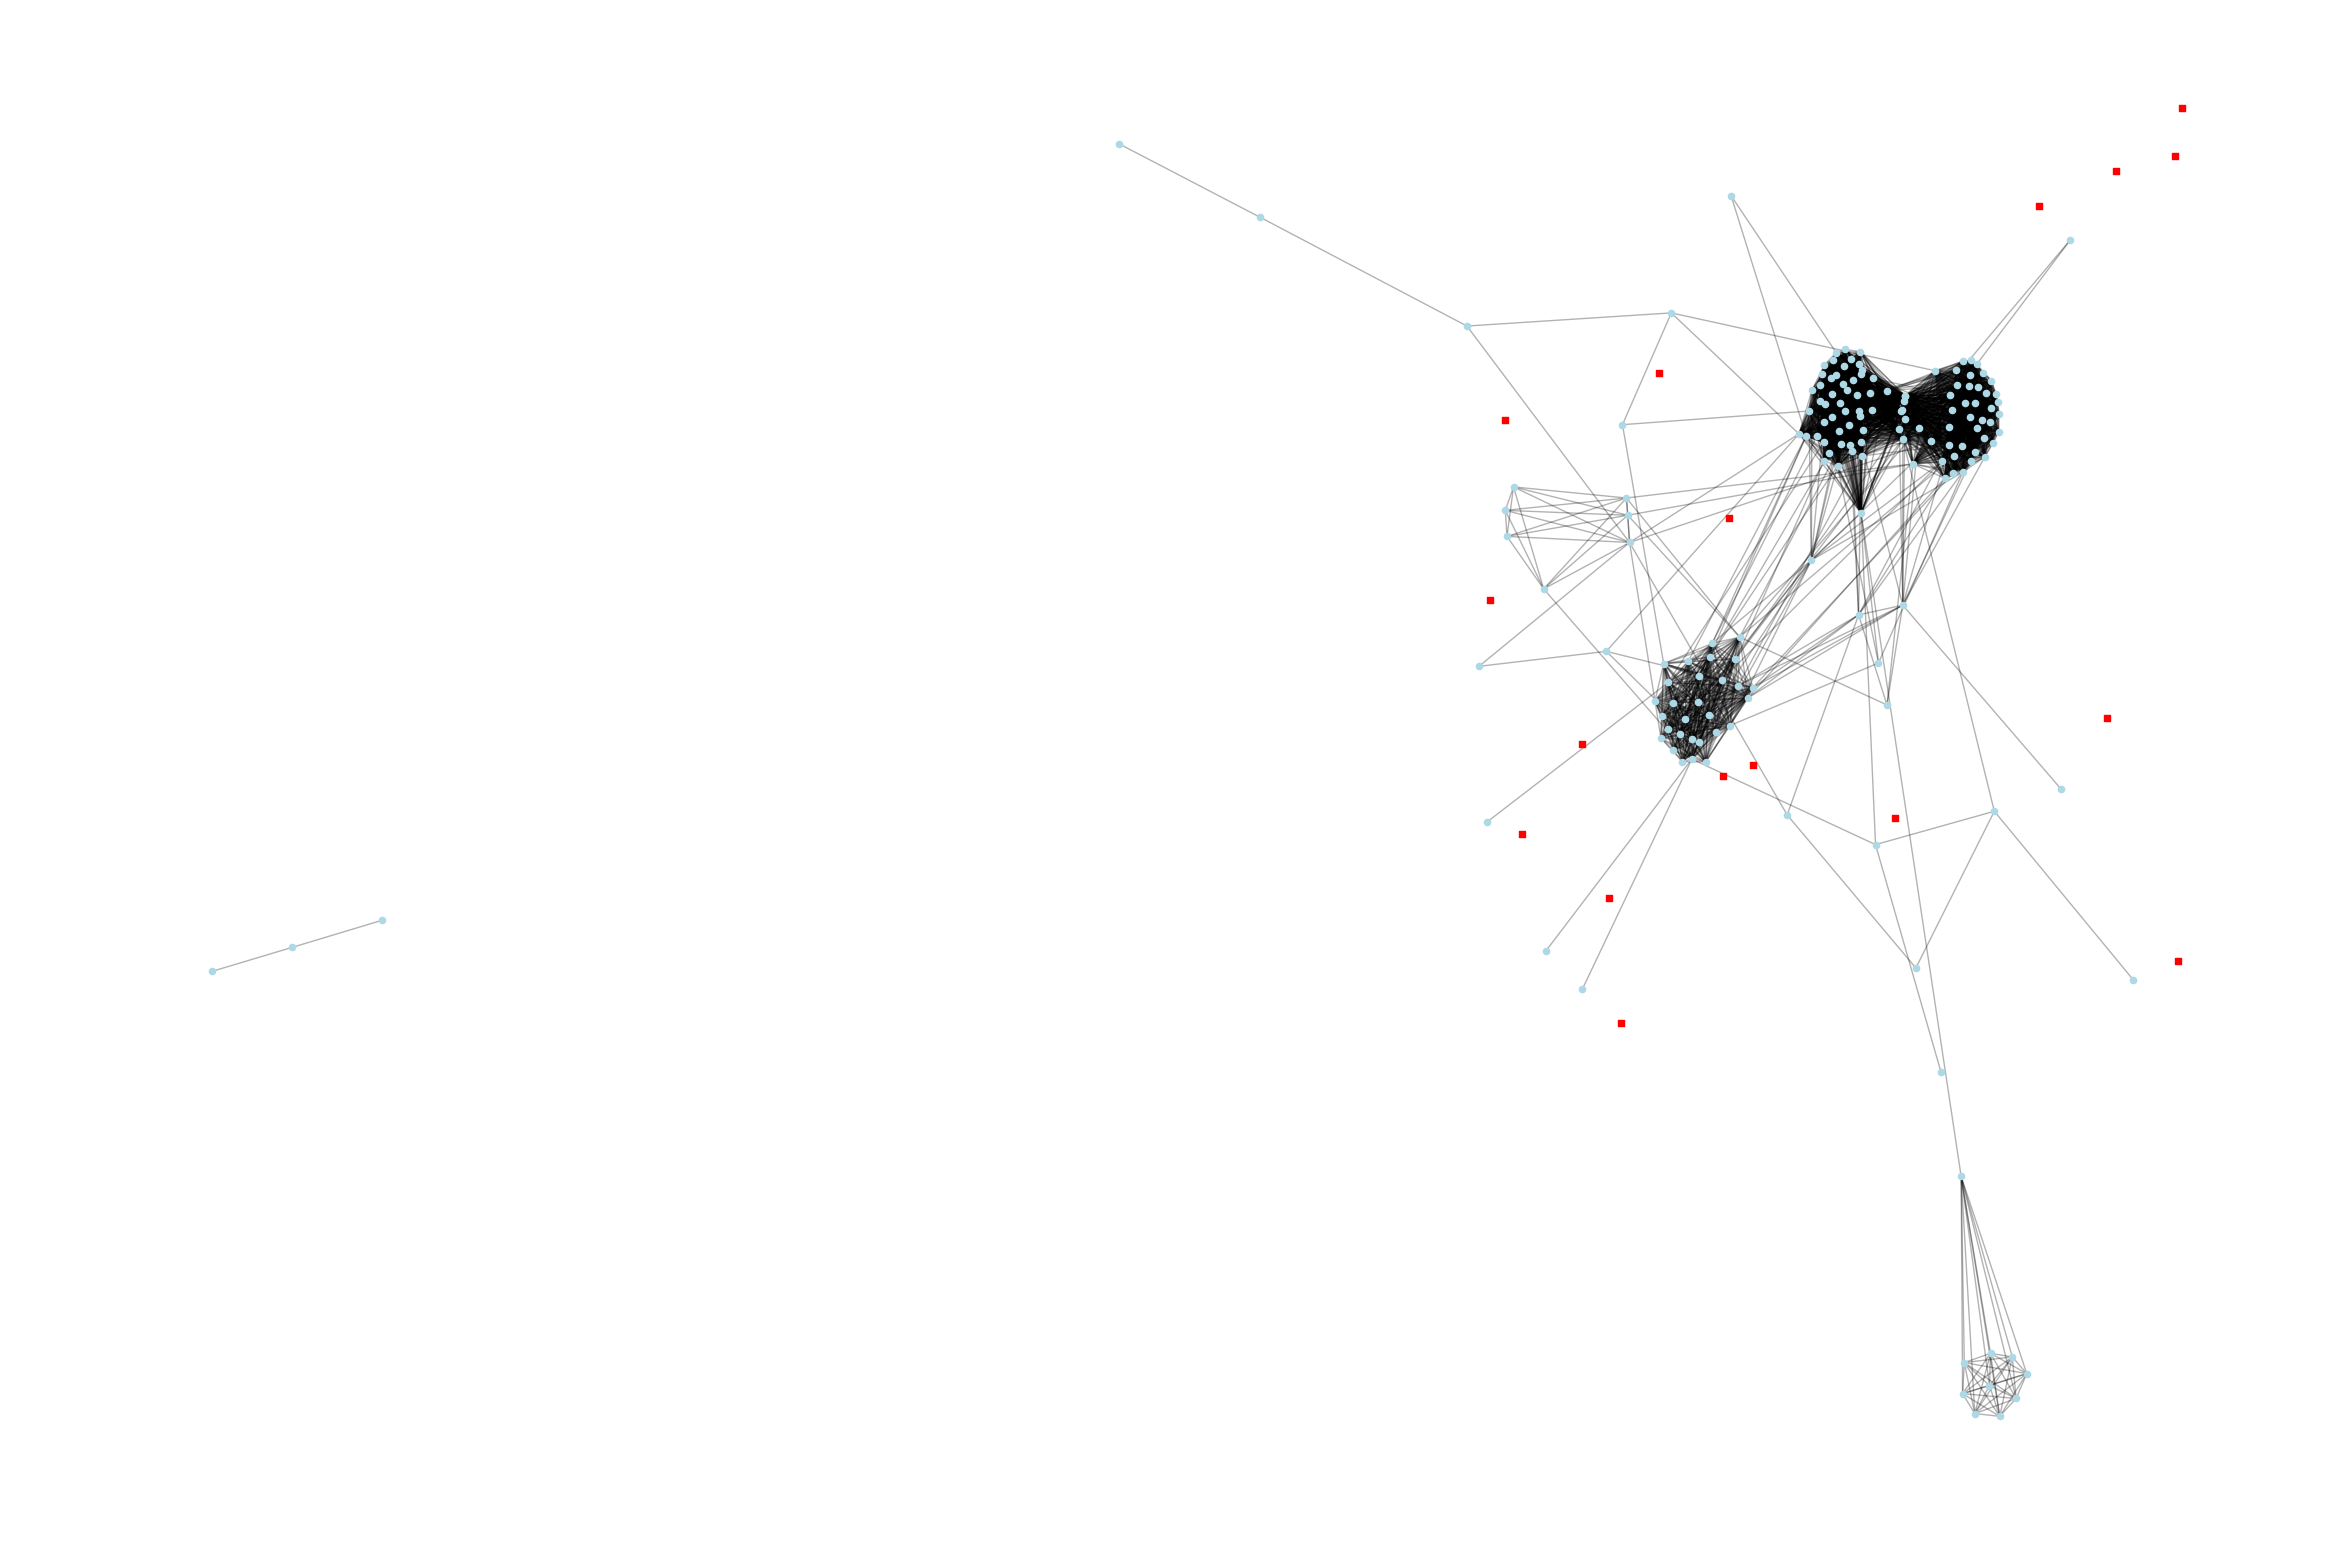

In [54]:
# affiche les liens entre protéines 
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(PPI, seed=100)
offset = 0.2
for node in isolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(PPI, pos, alpha=0.3)
nx.draw_networkx_nodes(PPI, pos, nodelist=connectés, node_color='lightblue', node_size=20)

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(PPI, pos, nodelist=isolés, node_color='red', node_size=20, node_shape='s')

plt.axis('off')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()

In [55]:
# liste de couple de toutes les drogues
cd=[]
for i in range(len(combo)):
    gene1=combo.iloc[i, 0]
    gene2=combo.iloc[i, 1]
    cd.append((gene1,gene2))
# on a 715612 lien entre protéines

In [56]:
# graphe avec les protéines des 60 drogues
DI60=[]
for gene in cd:
    if gene[0] in CD and gene[1] in CD:
        DI60.append((gene[0],gene[1]))
# on prélève le nombre de protéines selon les drogues choisies

In [57]:
# on defini un graph
DI = nx.Graph()
DI.add_edges_from(DI60)
DI.add_nodes_from(CD)

In [58]:
# prop du graphe 
n_nodes = DI.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = DI.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(DI) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in DI.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")

Nombre de noeuds : 10
Nombre d'arêtes : 33
Densité : 0.733333
Degré moyen : 6.60
Degré min : 1
Degré max : 8


In [59]:
# trouve les noeuds isolés
Disolés = [i for i in DI.nodes() if DI.degree(i) == 0]
Dconnectés = [i for i in DI.nodes() if DI.degree(i) != 0]

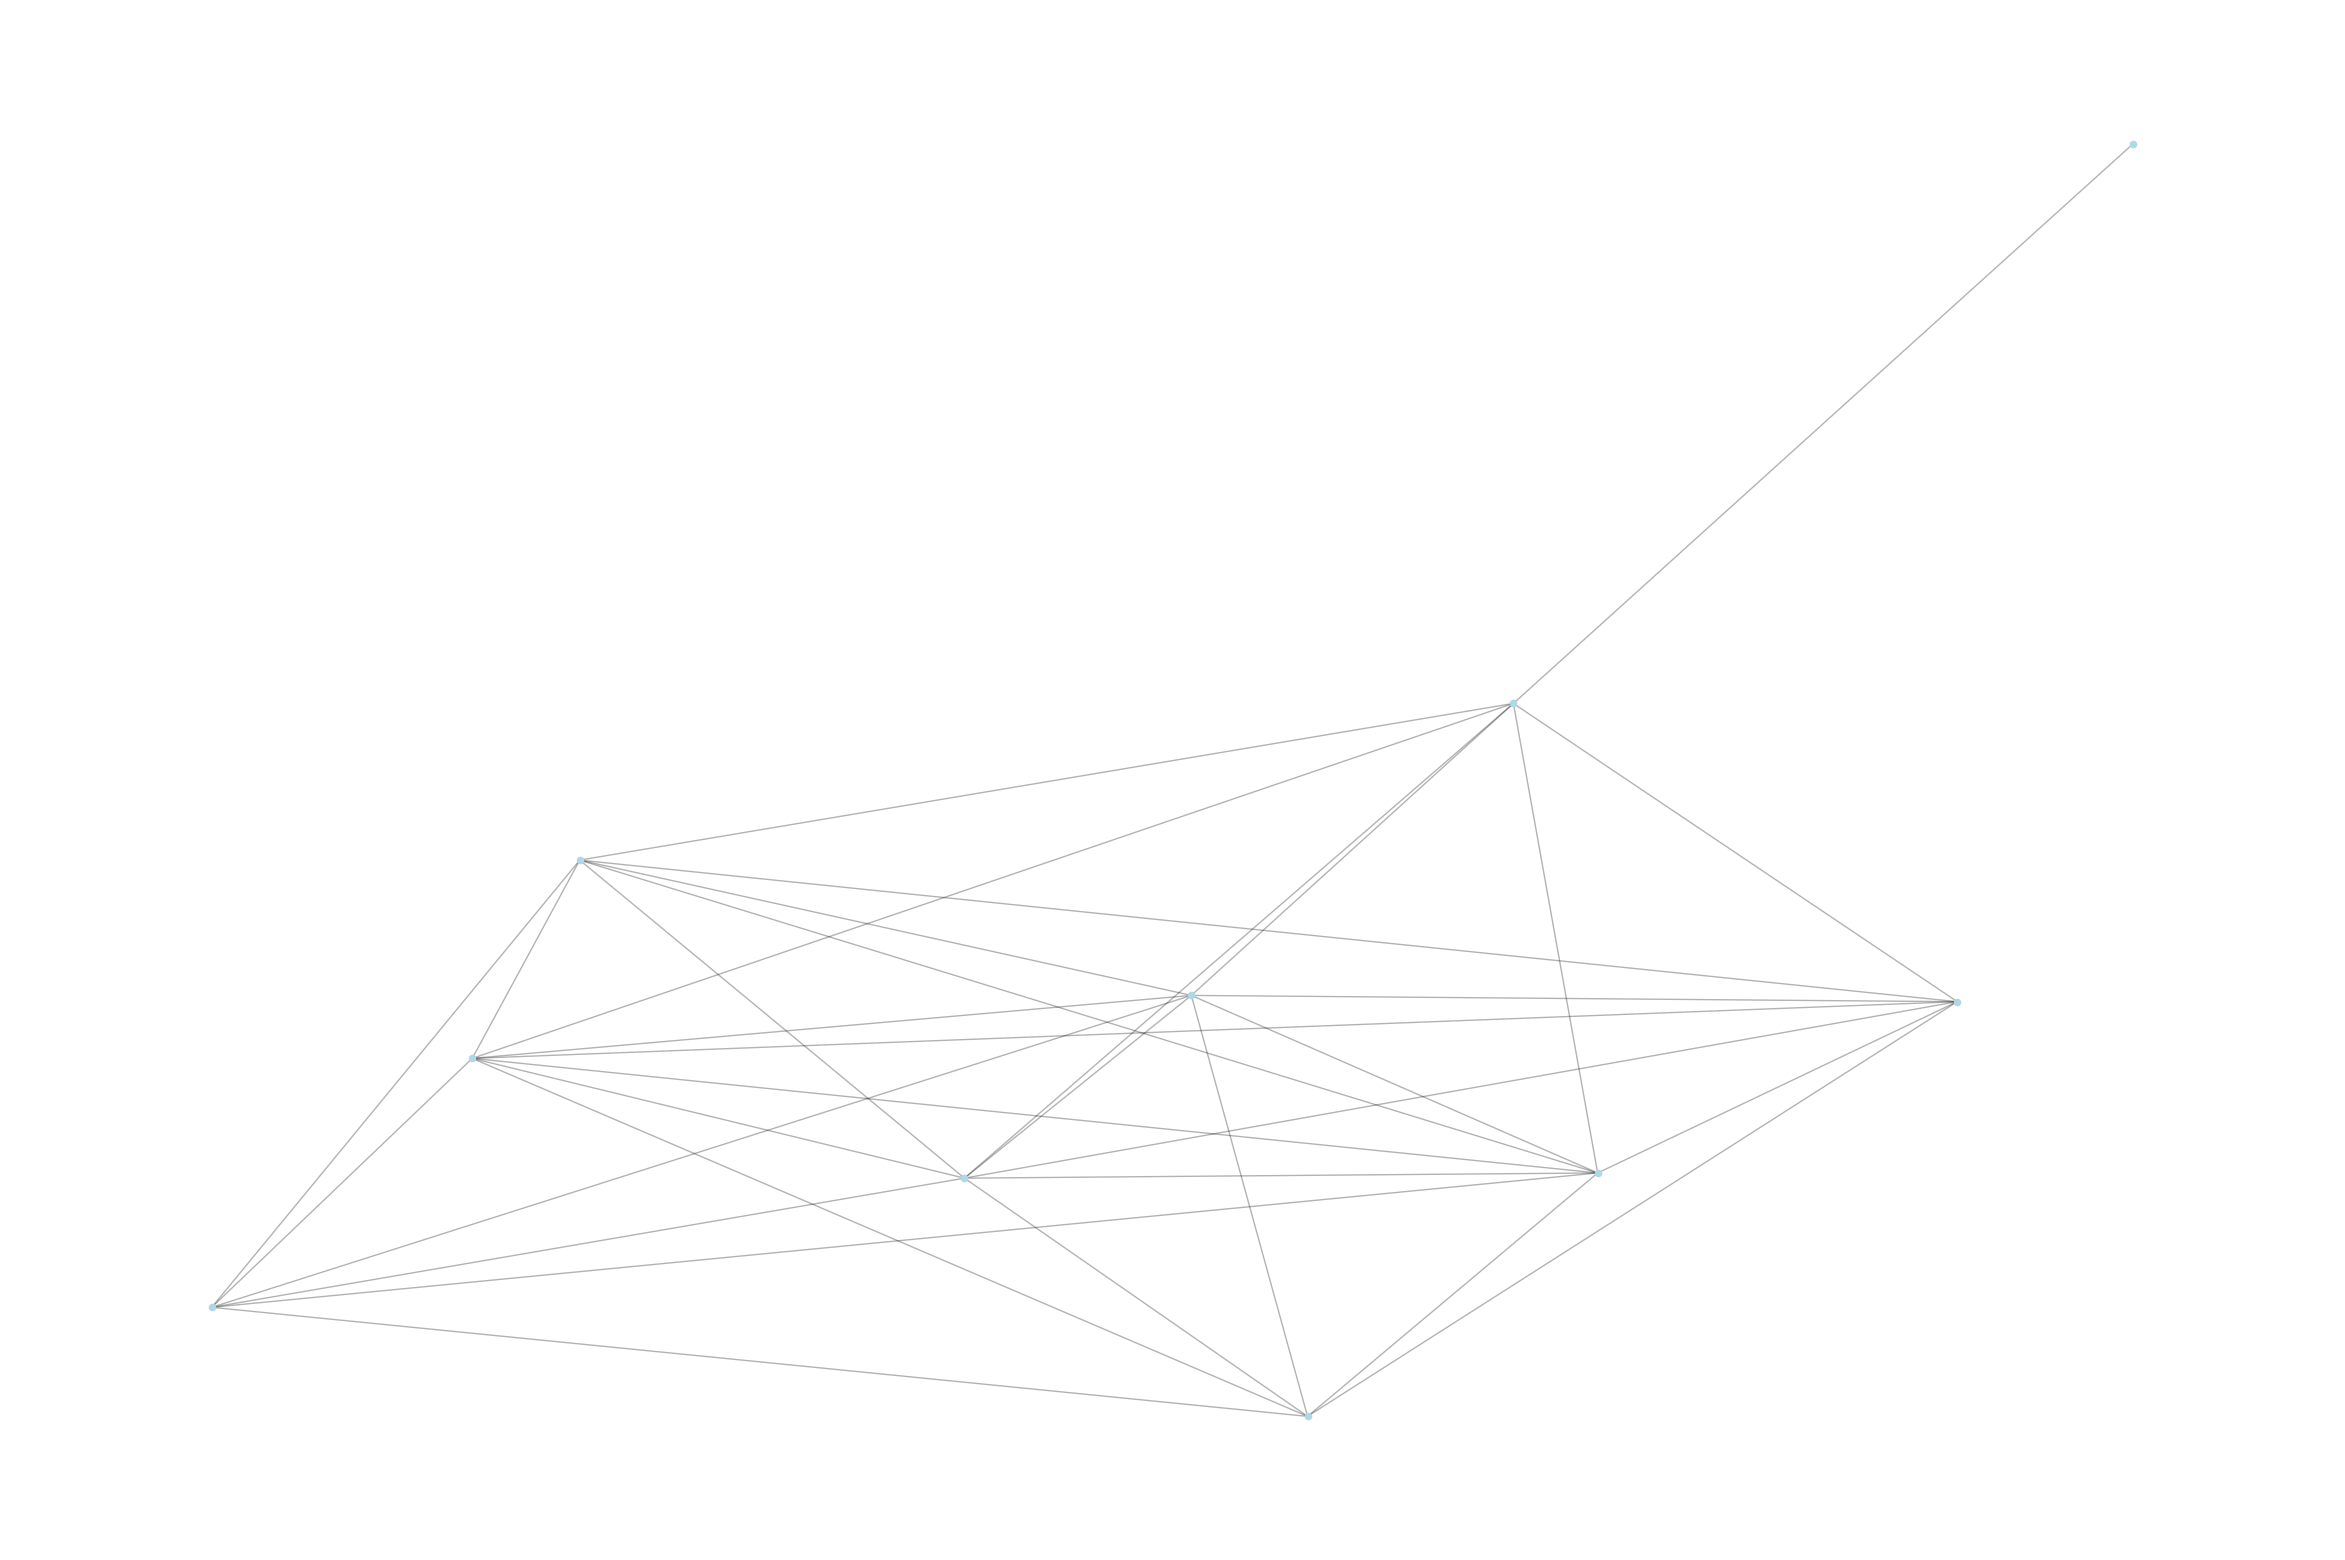

In [60]:
# affiche les liens entre protéines 
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(DI, seed=100)
offset = 0.2
for node in Disolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(DI, pos, alpha=0.3)
nx.draw_networkx_nodes(DI, pos, nodelist=Dconnectés, node_color='lightblue', node_size=20)

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(DI, pos, nodelist=Disolés, node_color='red', node_size=20, node_shape='s')

plt.axis('off')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()

In [61]:
# represente les liens entre drogues et proteines
PC=[]
for i in range(len(P60)):
    prot=P60.iloc[i,1]
    drogue=P60.iloc[i,0]
    PC.append((drogue,prot))
len(PC)

193

In [62]:
# on defini un graph
PC_graph = nx.Graph()
PC_graph.add_edges_from(PC) 
len(PC)

193

In [63]:
# prop du graphe 
n_nodes = PC_graph.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = PC_graph.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(PC_graph) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in PC_graph.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")

Nombre de noeuds : 191
Nombre d'arêtes : 193
Densité : 0.010637
Degré moyen : 2.02
Degré min : 1
Degré max : 167


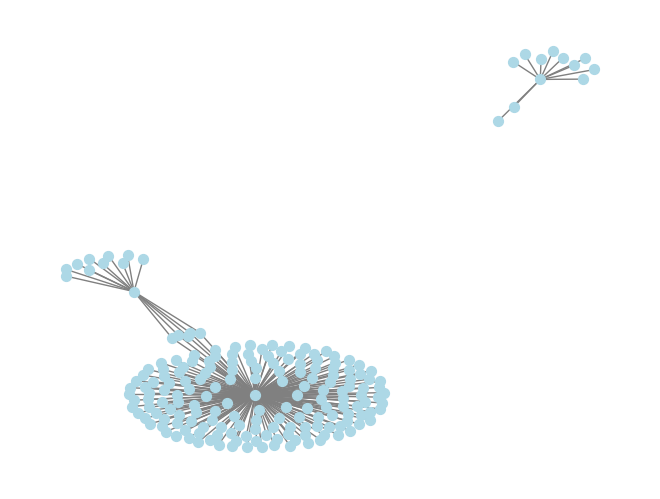

In [64]:
# affiche les liens entre protéines 
import numpy as np
# 2. Calculer la position des nœuds
pos = nx.spring_layout(PC_graph, seed=100)

# 3. Dessiner le graphe
nx.draw(PC_graph, pos, node_color='lightblue', edge_color='gray', node_size=50)

plt.show()

In [65]:
# graphe combiné
G = nx.Graph()
G.add_edges_from(PPI.edges())
G.add_edges_from(DI.edges())
G.add_edges_from(PC_graph.edges()) 

In [66]:
# prop du graphe 
n_nodes = G.number_of_nodes() # nombre de sommet dans le graphe len (Prot)
n_edges = G.number_of_edges() # nombre d'arêtes len(PPI60)
density = nx.density(G) # nombre de connexion existantes sur les possibles plus vers 1 plus complet 
# PPI.degree() donne le nombre de degree par noeuds
degrees = [d for n, d in G.degree()] # liste des degrées 
avg_degree = sum(degrees) / n_nodes # degré moyen
min_degree = min(degrees) # minumun de degré
max_degree = max(degrees) # max de degré

print(f"Nombre de noeuds : {n_nodes}")
print(f"Nombre d'arêtes : {n_edges}")
print(f"Densité : {density:.6f}")
print(f"Degré moyen : {avg_degree:.2f}")
print(f"Degré min : {min_degree}")
print(f"Degré max : {max_degree}")

Nombre de noeuds : 198
Nombre d'arêtes : 3596
Densité : 0.184382
Degré moyen : 36.32
Degré min : 1
Degré max : 175


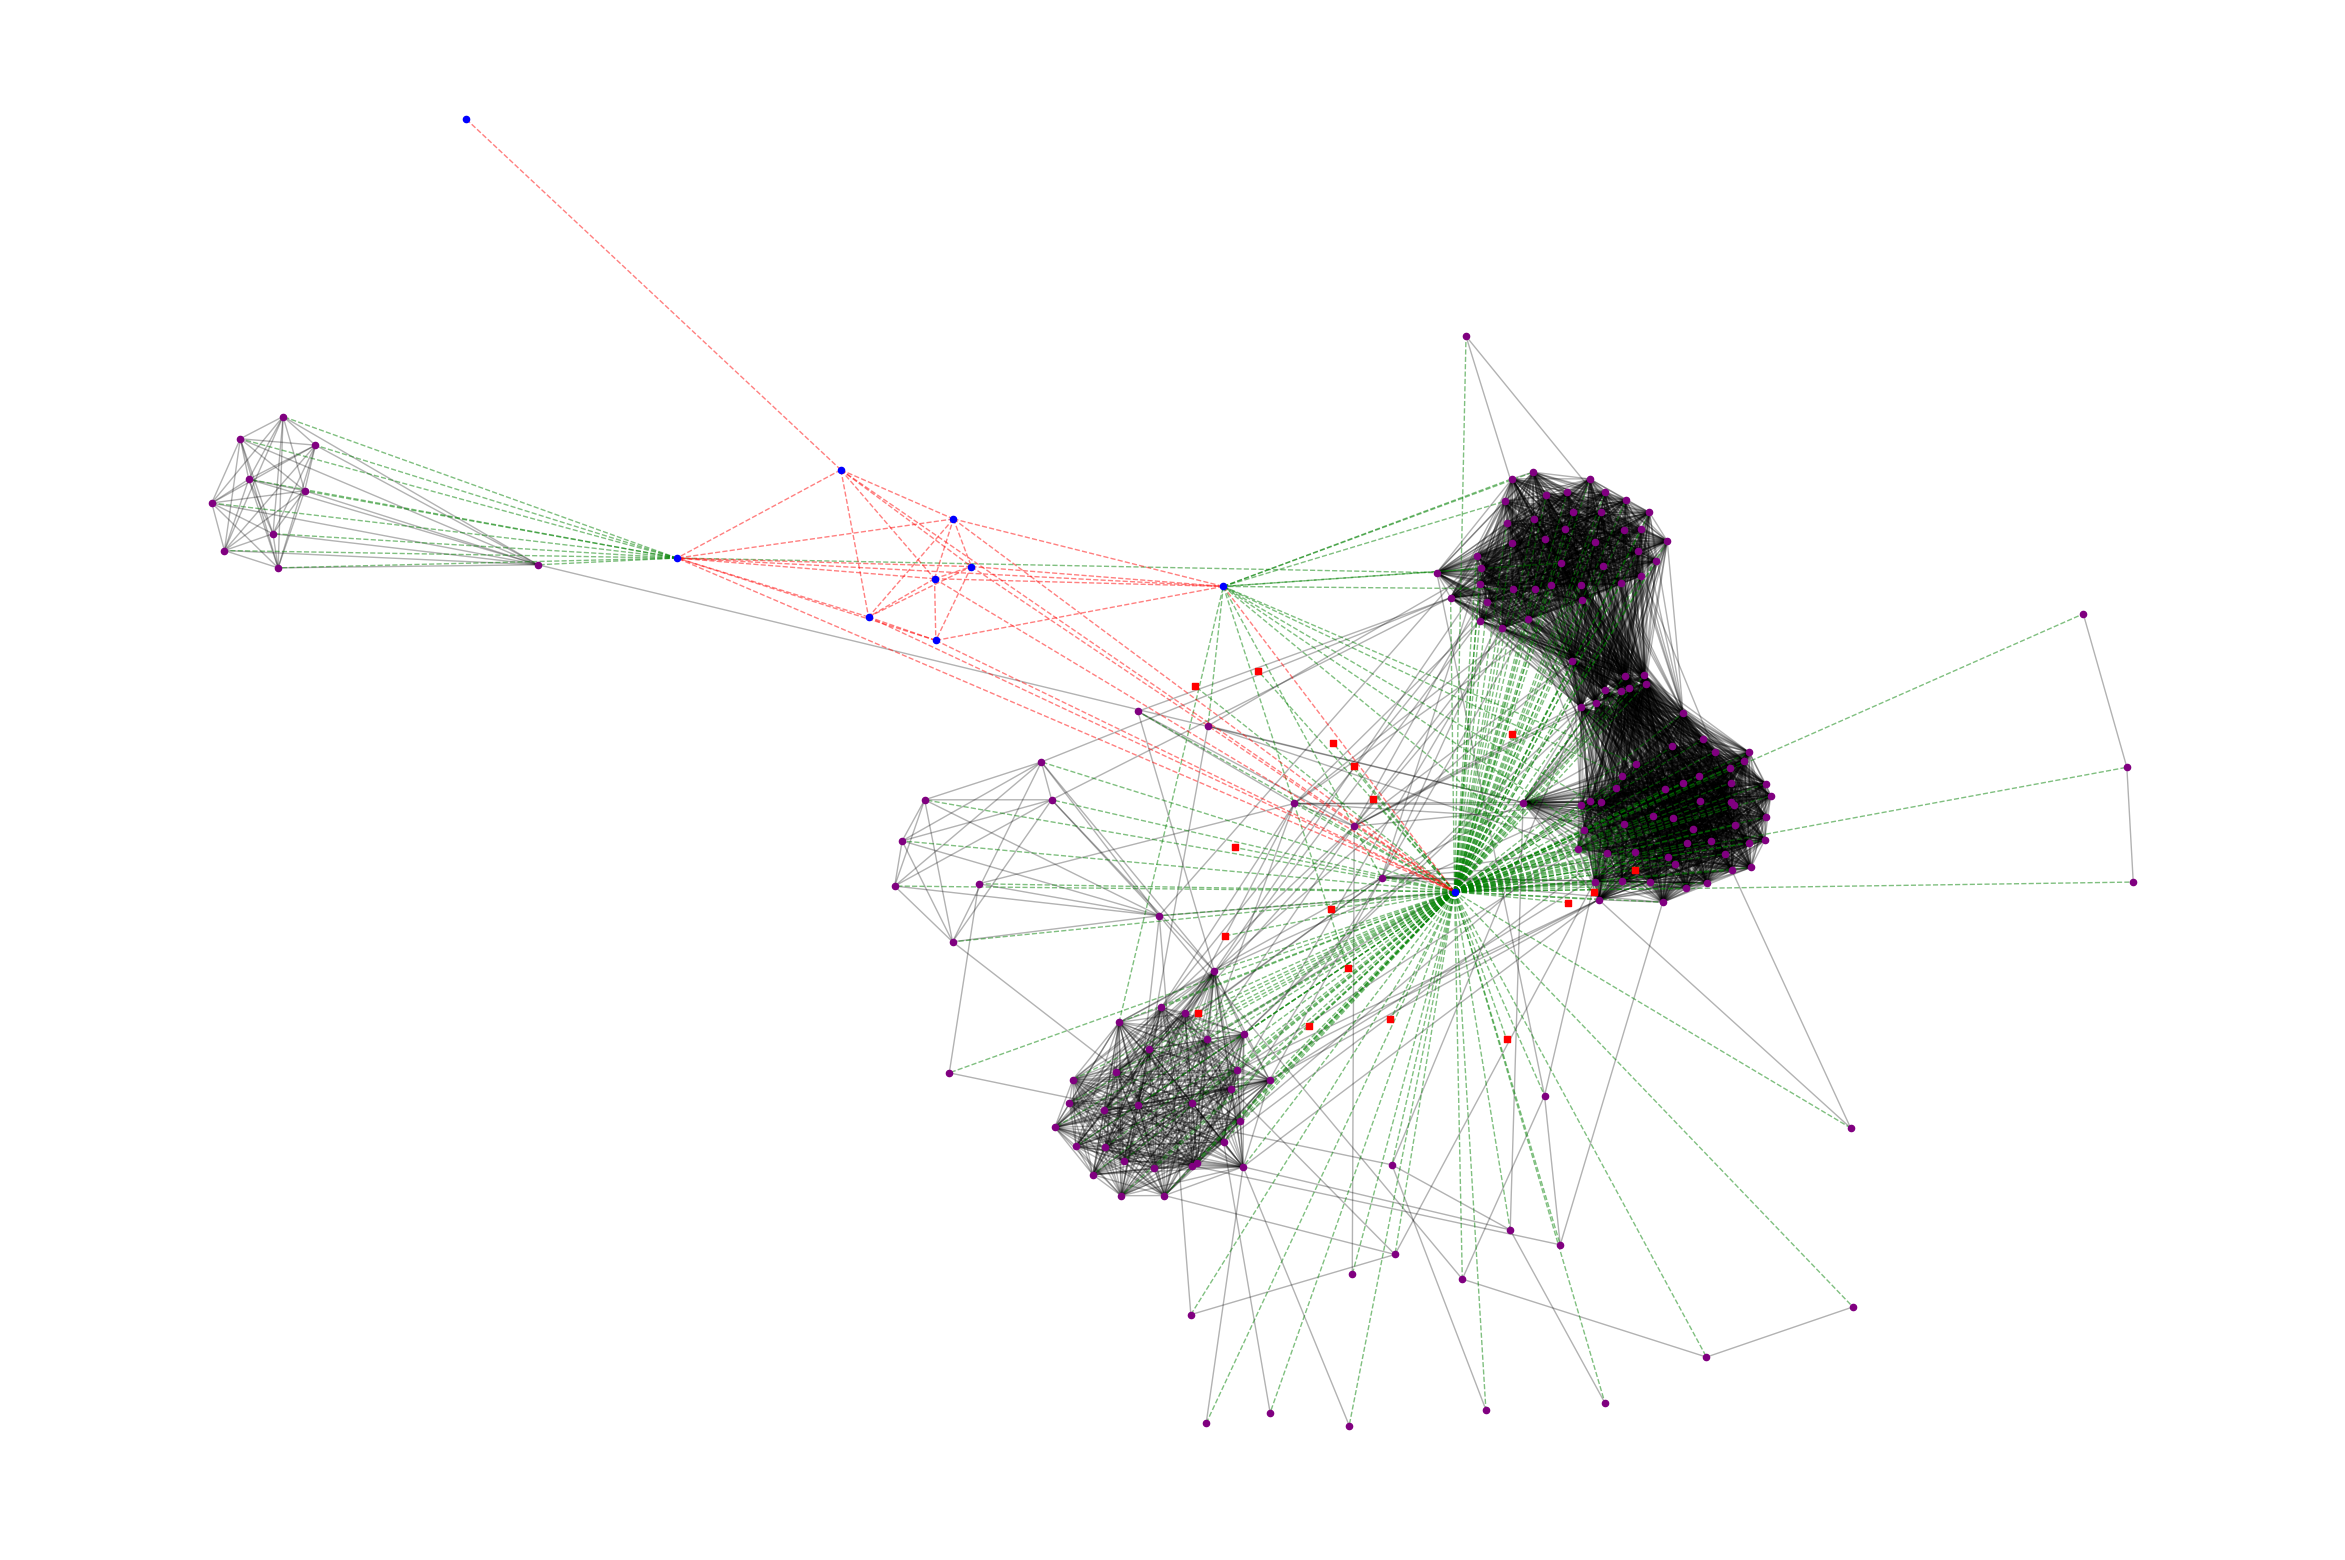

In [67]:
import numpy as np
plt.figure(figsize=(30,20))
pos = nx.spring_layout(G, seed=100)
offset = 0.2
for node in isolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
for node in Disolés:
    pos[node] = np.array([
        np.random.uniform(-offset, offset),
        np.random.uniform(-offset, offset)
    ])
# Dessiner les arêtes et les nœuds connectés

nx.draw_networkx_nodes(G, pos, nodelist=Dconnectés, node_color='blue', node_size=20) # drogues avec combinaison en bleu

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(G, pos, nodelist=Disolés, node_color='green', node_size=20, node_shape='s') # drogues isolées en bleu clair
# Dessiner les arêtes et les nœuds connectés
nx.draw_networkx_edges(PPI, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=connectés, node_color='purple', node_size=20) # ppi connecté en violet

# Dessiner les nœuds isolés différemment
nx.draw_networkx_nodes(G, pos, nodelist=isolés, node_color='red', node_size=20, node_shape='s') # ppi isolé en rouge
nx.draw_networkx_edges(PC_graph, pos, edge_color='green', alpha=0.5, style='dashed') #lien entre drogues et proteines en vert
nx.draw_networkx_edges(DI, pos, edge_color='red', alpha=0.5, style='dashed') # lien entre drogues
plt.axis('off')
#nx.draw(PPI, pos, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()